In [12]:
# Import dependencies 
import pandas as pd
from pandas import DataFrame
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import warnings
import sys

In [2]:
# Create connection to remote MySQL database
hostname = "gator3228.hostgator.com"
username = "rbrennan_sm_jb"
password = "This_is_not_the_password"
database = "rbrennan_stock_project_4"
# Create a database connection
db_url = f"mysql+mysqlconnector://{username}:{password}@{hostname}/{database}"
engine = create_engine(db_url)
# Test the connection
try:
    conn = engine.connect()
    print("Connected to MySQL database")
except Exception as e:
    print("Error:", e)
nikola_df = pd.read_sql("SELECT * FROM Nikola", conn)

nikola_df.head()

Connected to MySQL database


,Date,Open,High,Low,Close,Volume
0,2018-06-12,9.56,9.56,9.56,9.56,300000
1,2018-06-13,9.57,9.58,9.56,9.57,179100
2,2018-06-14,9.57,9.57,9.57,9.57,0
3,2018-06-15,9.57,9.57,9.57,9.57,0
4,2018-06-18,9.54,9.58,9.54,9.58,300


In [4]:
# Define the ARIMA model parameters
p = 1
d = 1
q = 2

In [6]:
# Check DF stats
nikola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1326 non-null   datetime64[ns]
 1   Open    1326 non-null   float64       
 2   High    1326 non-null   float64       
 3   Low     1326 non-null   float64       
 4   Close   1326 non-null   float64       
 5   Volume  1326 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 62.3 KB


In [7]:
# Set date column to index
nikola_df.set_index('Date', inplace=True)
nikola_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-12,9.56,9.56,9.56,9.56,300000
2018-06-13,9.57,9.58,9.56,9.57,179100
2018-06-14,9.57,9.57,9.57,9.57,0
2018-06-15,9.57,9.57,9.57,9.57,0
2018-06-18,9.54,9.58,9.54,9.58,300


In [8]:
# Split data for training & testing 


train_data, test_data = nikola_df[0:int(len(nikola_df)*0.9)], nikola_df[int(len(nikola_df)*0.9):]

# Target for predictions is the Closing Price (Close)
train_arima = train_data['Close']
test_arima = test_data['Close']


history = [x for x in train_arima]
y = test_arima

In [9]:
# Define the model and train it 
arima_model = ARIMA(history, order=(5,1,10))
model_fit = arima_model.fit()

c:\Users\justi\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# make first prediction
predictions = list()
# rolling forecasts
for i in range(1, len(y)):
    # predict
    arima_model = ARIMA(history, order=(1,1,0))
    model_fit = arima_model.fit()
    yhat = model_fit.forecast()[0]

    print(yhat)

    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

1.939101406673293
1.6348391896959855
1.790781907271947
1.6601170109608845
1.6373046228106876
1.759882946623516
1.6955078406281865
1.5474217072992755
1.6253905336182124
1.5001175611347346
1.4010157053606558
1.5080856260851914
1.5108984030496133
1.4773047943669997
1.5017967995085915
1.391016060165394
1.1929296084157457
1.2971871393084282
1.2137113695052084
1.165508081848018
1.2244918804844764
1.187304886380838
1.0810162134231478
0.9842855037179402
0.967933668494819
0.8065237944437353
0.9169955168721697
0.9841988690351144
0.9038910638572676
0.91
0.9241678826893357
0.8107468152525893
0.8156406536987683
0.8040117978517218
0.8856478874342628
0.8866288540975095
0.8325980273032906
0.8620662232513874
0.9253901675052686
0.913460984486642
0.9848393264060582
0.9855390145826315
0.8455010507683169
0.7948792876122532
0.8326950951426513
0.7624301698729828
0.7571016398554261
0.700238684641538
0.742054409446825
0.739
0.7597068744921732
0.8179409660397398
0.778125274010642
0.7711914830458982
0.6008958159

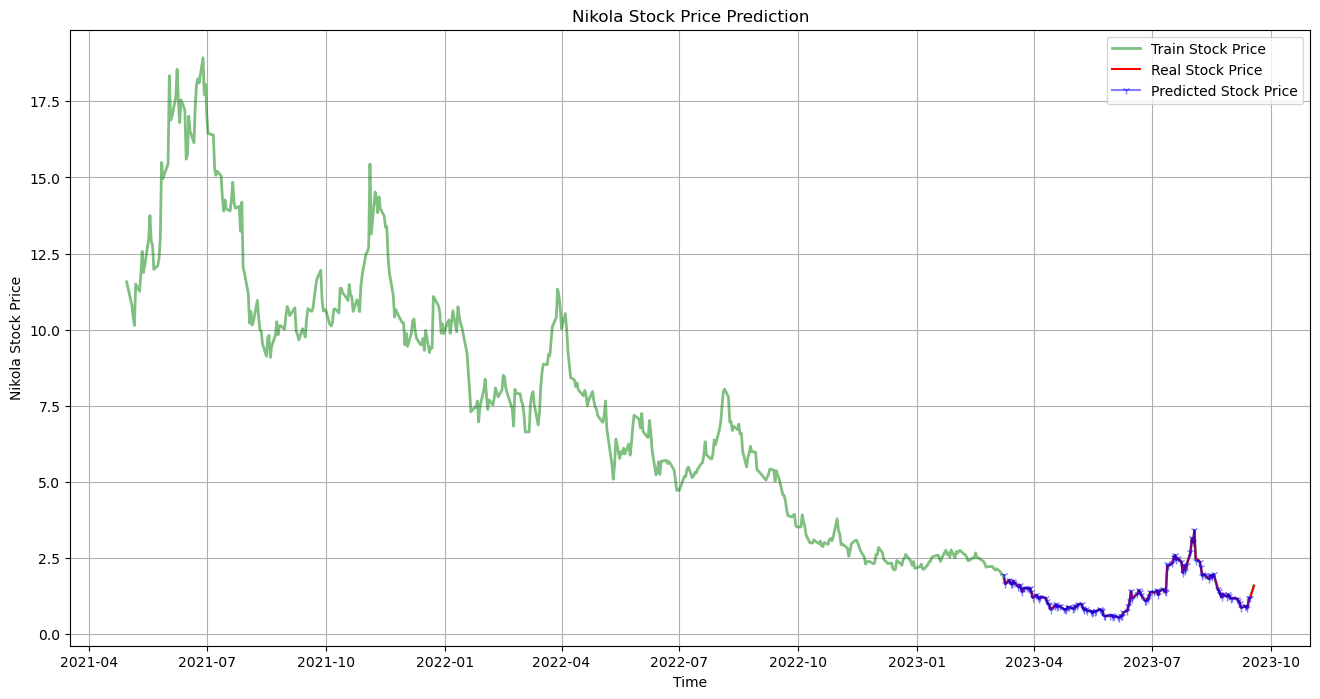

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(nikola_df.index[-600:], nikola_df['Close'].tail(600), 'g-',alpha=0.5,linewidth=2,label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index[:-1], predictions, 'b1-', alpha=0.5,label = 'Predicted Stock Price')
plt.title('Nikola Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nikola Stock Price')
plt.legend()
plt.grid(True)
# plt.savefig('')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1324
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2565.553
Date:                Mon, 25 Sep 2023   AIC                           5135.106
Time:                        17:28:18   BIC                           5145.481
Sample:                             0   HQIC                          5138.995
                               - 1324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0897      0.010      9.328      0.000       0.071       0.109
sigma2         2.8306      0.011    252.244      0.000       2.809       2.853
Ljung-Box (L1) (Q):                   0.56   Jarque-

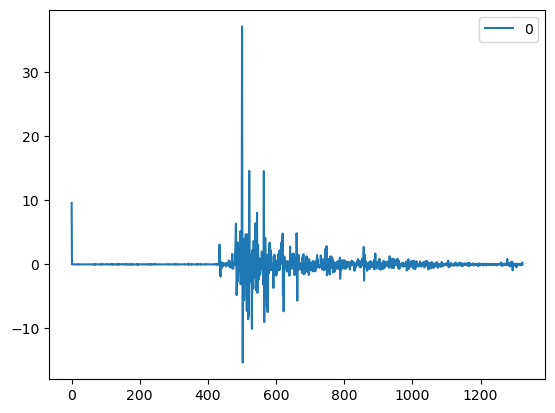

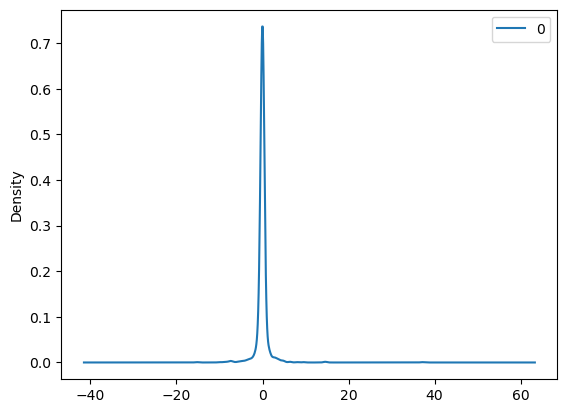

                 0
count  1324.000000
mean      0.001469
std       1.702857
min     -15.299723
25%      -0.126218
50%       0.000000
75%       0.074708
max      37.100773


In [13]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [14]:
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]

print(yhat)

1.6258977300439865
